In [11]:
%load_ext autoreload
%autoreload 2

import numpy as np
import scipy.stats as stats
import scipy.special
#graphing
import matplotlib.pyplot as plt
#stats
import statsmodels.api as sm
from statsmodels.base.model import GenericLikelihoodModel

#import testing
import sys
sys.path.append("../")
import vuong_plots

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
class OLS_loglike(GenericLikelihoodModel):
    
    def __init__(self, *args,ols=False, **kwargs):
        super(OLS_loglike,self).__init__(*args,**kwargs)
        self.ols = ols

    def loglikeobs(self, params):
        y = self.endog
        x = self.exog
        mu_y = np.matmul(x,params)  
        resid = y - mu_y
        sigma = np.sqrt(np.sum(resid**2)/resid.shape[0])
        pr_y = stats.norm.logpdf( resid, loc=0,scale=sigma )
        return pr_y


def setup_shi(yn,xn,return_model=False,num_params=4):
    x1n,x2n = xn[:,0].reshape(xn.shape[0],1),xn[:,1:num_params]
    # model 1 grad, etc.
    model1 = sm.OLS(yn,sm.add_constant(x1n))
    model1_fit = model1.fit(disp=False)
    params1 = (model1_fit.params)
    
    model1_deriv = OLS_loglike(yn,sm.add_constant(x1n))
    ll1 = model1_deriv.loglikeobs(model1_fit.params)
    grad1 =  model1_deriv.score_obs(model1_fit.params)    
    hess1 = model1_deriv.hessian(model1_fit.params)
    
    #model 2 grad, etc.
    model2 = sm.OLS(yn,sm.add_constant(x2n))
    model2_fit = model2.fit(disp=False)
    params2 = (model2_fit.params)
    
    model2_deriv = OLS_loglike(yn,sm.add_constant(x2n))
    ll2 = model2_deriv.loglikeobs(model2_fit.params)
    grad2 =  model2_deriv.score_obs(model2_fit.params)    
    hess2 = model2_deriv.hessian(model2_fit.params)
    
    if return_model:
        return ll1,grad1,hess1,params1,model1,ll2,grad2,hess2,params2,model2
    return ll1,grad1,hess1,params1,ll2,grad2,hess2,params2

def gen_data(nobs=1000, a=0.0, num_params=1):
    x = np.random.normal(scale=1., size=(nobs,1+num_params))
    e = np.random.normal(loc=0.0, scale=1.0, size=nobs)
    y = 1 + a*x[:,0] + a/np.sqrt(num_params)*x[:,1:num_params+1].sum(axis=1) + e
    return y,x,nobs

yn,xn,nobs = gen_data()
ll1,grad1,hess1,params1,ll2,grad2,hess2,params2 = setup_shi(yn,xn,return_model=False,num_params=15)
print(grad1.shape,hess1.shape)

(1000, 2) (2, 2)


# a = 0

../figs/a0_k1.png


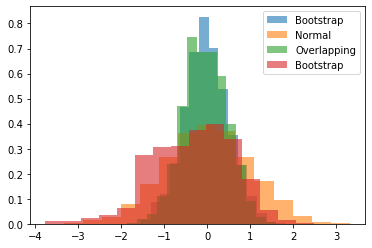

\begin{center}
\begin{tabular}{ccccccc}
\toprule
\textbf{Test} & \textbf{Mean} & \textbf{Var} & \textbf{K-Stat 3} & \textbf{K-Stat 4} & \textbf{Skew} & \textbf{Kurtosis} \\ \midrule
True & -0.010 & 0.265 & 0.007 & -0.001 & 0.007 & 0.209 \\
Bootstrap & -0.317 & 0.891 & -0.310 & 0.124 & -0.309 & 2.496 \\
Normal & 0.004 & 0.957 & -0.025 & -0.110 & -0.024 & 2.638 \\
Overlapping & -0.052 & 0.259 & 0.001 & -0.010 & 0.001 & 0.191 \\
\bottomrule
\end{tabular}
\end{center}


In [21]:
a = 0
k = 1
gen_data_ex = lambda : gen_data(nobs=1000,a=a,num_params=k)

vuong_plots.plot_kstats_table(gen_data_ex,setup_shi,figtitle='../figs/a%s_k%s.png'%(int(a*100),k))

../figs/a0_k9.png


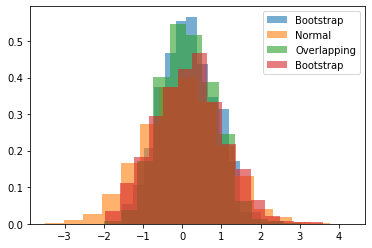

\begin{center}
\begin{tabular}{ccccccc}
\toprule
\textbf{Test} & \textbf{Mean} & \textbf{Var} & \textbf{K-Stat 3} & \textbf{K-Stat 4} & \textbf{Skew} & \textbf{Kurtosis} \\ \midrule
True & 0.160 & 0.476 & 0.049 & -0.055 & 0.049 & 0.622 \\
Bootstrap & 0.197 & 0.768 & 0.145 & -0.014 & 0.144 & 1.746 \\
Normal & 0.014 & 0.989 & 0.023 & -0.018 & 0.023 & 2.917 \\
Overlapping & 0.153 & 0.462 & 0.075 & 0.028 & 0.075 & 0.667 \\
\bottomrule
\end{tabular}
\end{center}


In [14]:
a = 0
k = 9
gen_data_ex = lambda : gen_data(nobs=1000,a=a,num_params=k)
vuong_plots.plot_kstats_table(gen_data_ex,setup_shi,figtitle='../figs/a%s_k%s.png'%(int(a*100),k))

../figs/a0_k4.png


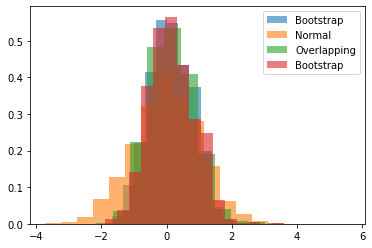

\begin{center}
\begin{tabular}{ccccccc}
\toprule
\textbf{Test} & \textbf{Mean} & \textbf{Var} & \textbf{K-Stat 3} & \textbf{K-Stat 4} & \textbf{Skew} & \textbf{Kurtosis} \\ \midrule
True & 0.135 & 0.448 & 0.057 & 0.041 & 0.057 & 0.641 \\
Bootstrap & 0.159 & 0.480 & 0.115 & 0.100 & 0.114 & 0.787 \\
Normal & 0.004 & 1.032 & -0.023 & 0.026 & -0.023 & 3.217 \\
Overlapping & 0.156 & 0.482 & 0.128 & 0.217 & 0.128 & 0.913 \\
\bottomrule
\end{tabular}
\end{center}


In [15]:
a = 0
k = 4
gen_data_ex = lambda : gen_data(nobs=1000,a=a,num_params=k)
vuong_plots.plot_kstats_table(gen_data_ex,setup_shi,figtitle='../figs/a%s_k%s.png'%(int(a*100),k))

../figs/a0_k19.png


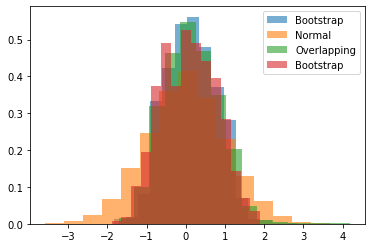

\begin{center}
\begin{tabular}{ccccccc}
\toprule
\textbf{Test} & \textbf{Mean} & \textbf{Var} & \textbf{K-Stat 3} & \textbf{K-Stat 4} & \textbf{Skew} & \textbf{Kurtosis} \\ \midrule
True & 0.149 & 0.430 & 0.037 & -0.024 & 0.037 & 0.529 \\
Bootstrap & 0.081 & 0.495 & 0.026 & -0.128 & 0.026 & 0.606 \\
Normal & 0.006 & 1.003 & 0.006 & 0.029 & 0.006 & 3.045 \\
Overlapping & 0.151 & 0.479 & 0.117 & 0.114 & 0.117 & 0.803 \\
\bottomrule
\end{tabular}
\end{center}


In [16]:
a = 0
k = 19
gen_data_ex = lambda : gen_data(nobs=1000,a=a,num_params=k)

vuong_plots.plot_kstats_table(gen_data_ex,setup_shi,figtitle='../figs/a%s_k%s.png'%(int(a*100),k))

# a = .25

../figs/a25_k1.png


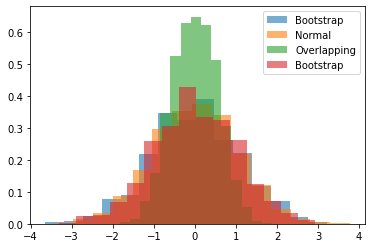

\begin{center}
\begin{tabular}{ccccccc}
\toprule
\textbf{Test} & \textbf{Mean} & \textbf{Var} & \textbf{K-Stat 3} & \textbf{K-Stat 4} & \textbf{Skew} & \textbf{Kurtosis} \\ \midrule
True & -0.003 & 1.133 & -0.050 & -0.107 & -0.050 & 3.727 \\
Bootstrap & 0.008 & 0.999 & -0.052 & -0.087 & -0.052 & 2.898 \\
Normal & 0.024 & 1.024 & -0.038 & -0.029 & -0.038 & 3.112 \\
Overlapping & -0.000 & 0.304 & -0.003 & -0.028 & -0.003 & 0.248 \\
\bottomrule
\end{tabular}
\end{center}


In [17]:
a=.25
k = 1
gen_data_ex = lambda : gen_data(nobs=1000,a=a,num_params=k)

vuong_plots.plot_kstats_table(gen_data_ex,setup_shi,figtitle='../figs/a%s_k%s.png'%(int(a*100),k))

../figs/a25_k9.png


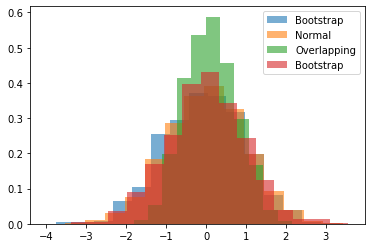

\begin{center}
\begin{tabular}{ccccccc}
\toprule
\textbf{Test} & \textbf{Mean} & \textbf{Var} & \textbf{K-Stat 3} & \textbf{K-Stat 4} & \textbf{Skew} & \textbf{Kurtosis} \\ \midrule
True & -0.047 & 1.015 & -0.132 & -0.077 & -0.132 & 3.003 \\
Bootstrap & -0.026 & 0.948 & -0.045 & 0.265 & -0.045 & 2.948 \\
Normal & 0.005 & 1.002 & -0.040 & -0.017 & -0.040 & 2.992 \\
Overlapping & 0.111 & 0.416 & 0.045 & -0.019 & 0.045 & 0.499 \\
\bottomrule
\end{tabular}
\end{center}


In [18]:
a=.25
k = 9
gen_data_ex = lambda : gen_data(nobs=1000,a=a,num_params=k)

vuong_plots.plot_kstats_table(gen_data_ex,setup_shi,figtitle='../figs/a%s_k%s.png'%(int(a*100),k))

../figs/a25_k4.png


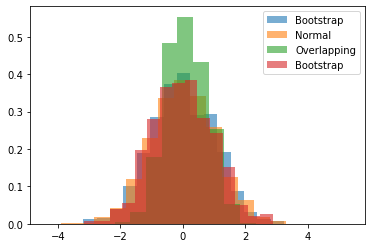

\begin{center}
\begin{tabular}{ccccccc}
\toprule
\textbf{Test} & \textbf{Mean} & \textbf{Var} & \textbf{K-Stat 3} & \textbf{K-Stat 4} & \textbf{Skew} & \textbf{Kurtosis} \\ \midrule
True & -0.011 & 1.007 & -0.032 & -0.037 & -0.032 & 2.996 \\
Bootstrap & -0.006 & 0.959 & 0.083 & -0.039 & 0.083 & 2.708 \\
Normal & 0.012 & 1.035 & -0.025 & -0.002 & -0.025 & 3.207 \\
Overlapping & 0.118 & 0.432 & 0.046 & 0.073 & 0.046 & 0.632 \\
\bottomrule
\end{tabular}
\end{center}


In [19]:
a=.25
k = 4
gen_data_ex = lambda : gen_data(nobs=1000,a=a,num_params=k)

vuong_plots.plot_kstats_table(gen_data_ex,setup_shi,figtitle='../figs/a%s_k%s.png'%(int(a*100),k))

../figs/a25_k19.png


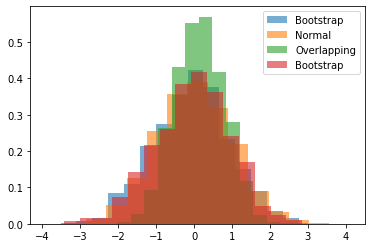

\begin{center}
\begin{tabular}{ccccccc}
\toprule
\textbf{Test} & \textbf{Mean} & \textbf{Var} & \textbf{K-Stat 3} & \textbf{K-Stat 4} & \textbf{Skew} & \textbf{Kurtosis} \\ \midrule
True & -0.075 & 0.996 & -0.074 & -0.081 & -0.074 & 2.887 \\
Bootstrap & -0.046 & 0.971 & -0.177 & -0.026 & -0.177 & 2.794 \\
Normal & 0.007 & 0.992 & 0.014 & 0.011 & 0.014 & 2.964 \\
Overlapping & 0.140 & 0.435 & 0.025 & -0.010 & 0.025 & 0.558 \\
\bottomrule
\end{tabular}
\end{center}


In [20]:
a= .25
k = 19
gen_data_ex = lambda : gen_data(nobs=1000,a=a,num_params=k)

vuong_plots.plot_kstats_table(gen_data_ex,setup_shi,figtitle='../figs/a%s_k%s.png'%(int(a*100),k))